# EDA steps

## Step 1: Describe your dataset.

The data is obtained from tidytuesday.com.We have considered two csv files here, one contiaining tuition cost and second with school ranking and salary of graduates.The dataset contains the tuition fees for domestic and international students depending on the length of degree program in US universities for a master program. We can use the data that is provided to predict the tuition cost or the early salary of a graduate for the other similar courses or the courses with similar length duration to compare their prices.

The tuition dataset has 10 fields. 

|variable             |class     |description |
|:--------------------:|:---------:|:-----------:|
|Name                 |character |School name |
|State                |character | State name |
|State_code           |character | State Abbreviation |
|Type                 |character | Type: Public, private, for-profit|
|Degree_length        |character | 4 year or 2 year degree |
|Room_and_Board       |double    | Room and board in USD |
|Instate_tuition     |double    | Tuition for in-state residents in USD |
|Instate_total       |double    | Total cost for in-state residents in USD (sum of room & board + in state tuition) |
|Outstate_tuition |double    | Tuition for out-of-state residents in USD|
|Outstate_total   |double    | Total cost for out-of-state residents in USD (sum of room & board + out of state tuition) |

The salary dataset has 7 fields.

|variable             |class     |description |
|:--------------------:|:---------:|:-----------:|
|Rank|double|Potential salary rank within state|
|Name|character|Name of school|
|State_name|character|state name|
|Early_career_pay|double|Estimated early career pay in USD|
|Mid_career_pay|double|Estimated mid career pay in USD|
|Make_world_better_percent|double|Percent of alumni who think they are making the world a better place|
|Stem_percent|double|Percent of student body in STEM|


## Step 2: Load your dataset

In [1]:
library(readr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.7
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')

salarydf <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv')



Rows: 2973 Columns: 10

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): name, state, state_code, type, degree_length
dbl (5): room_and_board, in_state_tuition, in_state_total, out_of_state_tuit...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
head(df,2)

name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aaniiih Nakoda College,Montana,MT,Public,2 Year,NA,2380,2380,2380,2380
Abilene Christian University,Texas,TX,Private,4 Year,10350,34850,45200,34850,45200


In [6]:
colnames(df) <- c('Name','State','State_code','Type','Degree_length','Room_and_Board','Instate_tuition','Instate_total','Outstate_tuition','Outstate_total')
colnames(salarydf) <- c('Rank','Name','State_name','Early_career_pay','mid_career_pay','make_world_better_percent','stem_percent')

head(salarydf,2)
head(df,2)

Name,State,State_code,Type,Degree_length,Room_and_Board,Instate_tuition,Instate_total,Outstate_tuition,Outstate_total
<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aaniiih Nakoda College,Montana,MT,Public,2 Year,NA,2380,2380,2380,2380
Abilene Christian University,Texas,TX,Private,4 Year,10350,34850,45200,34850,45200


## Step 3: Explore your dataset



In [14]:
df %>% arrange(desc(Instate_tuition)) %>% tail(5)

Name,State,State_code,Type,Degree_length,Room_and_Board,Instate_tuition,Instate_total,Outstate_tuition,Outstate_total
<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
College of the Canyons,California,CA,Public,2 Year,NA,1154,1154,7034,7034
Tohono O'odham Community College,Arizona,AZ,Public,2 Year,7622,987,8609,987,8609
Luna Community College,New Mexico,NM,Public,2 Year,NA,962,962,2426,2426
American Indian College of the Assemblies of God,Arizona,AZ,Private,4 Year,6250,958,7208,958,7208
Haskell Indian Nations University,Kansas,KS,Public,4 Year,950,480,1430,480,1430


In [13]:
df %>%arrange(desc(Outstate_tuition)) %>% head(5)

Name,State,State_code,Type,Degree_length,Room_and_Board,Instate_tuition,Instate_total,Outstate_tuition,Outstate_total
<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Columbia University,New York,NY,Private,4 Year,14016,59985,74001,59985,74001
University of Chicago,Illinois,IL,Private,4 Year,16350,58230,74580,58230,74580
Columbia University: School of General Studies,New York,NY,Private,4 Year,14190,57549,71739,57549,71739
Vassar College,New York,NY,Private,4 Year,13550,56960,70510,56960,70510
Trinity College,Connecticut,CT,Private,4 Year,14750,56910,71660,56910,71660


In [42]:
nrow(df_rmna)

[1] 1861

In [24]:
sum(is.na(df$State))

[1] 52

In [43]:
sum(is.na(df$Room_and_Board))

[1] 1094

## Step 4 : Initial thoughts

- We see more private universities/college than public ones, and we do not see any non-profit organization.
- We have 52 Nan values for the column State and 1094 for room and board, the Nan values fro state can be ignored but for room and board we can consider that those universities or college do not have room and board fees.
- The Private universities charge more when compared to public, but we also see that the cost for both instate and outstate students remain the same in private universities or college But even few public universities have the same cost as well.

## Step 5: Wrangling

Change columns to appropriate types: 

In [4]:
df$state_code <- as.factor(df$state_code)
df$type <- as.factor(df$type)
df$degree_length <- as.factor(df$degree_length)

Drop rows with NAs

In [9]:
df_rmna <- na.omit(df)

In [10]:
summary(df_rmna)

     Name              State             State_code           Type     
 Length:1861        Length:1861        NY     : 169   For Profit:  20  
 Class :character   Class :character   PA     : 124   Other     :   0  
 Mode  :character   Mode  :character   CA     : 110   Private   :1093  
                                       TX     : 102   Public    : 748  
                                       MA     :  74                    
                                       OH     :  70                    
                                       (Other):1212                    
 Degree_length Room_and_Board  Instate_tuition Instate_total   Outstate_tuition
 2 Year: 270   Min.   :   30   Min.   :  480   Min.   : 1430   Min.   :  480   
 4 Year:1591   1st Qu.: 7948   1st Qu.: 8500   1st Qu.:17618   1st Qu.:15670   
 Other :   0   Median :10010   Median :18150   Median :27780   Median :24630   
               Mean   :10102   Mean   :22071   Mean   :32173   Mean   :25845   
               3rd Qu.:1

## Step 6: Research questions

### Question 1
    
    Which are the universities/ colleges that are charging more , is the cost more for Instate or Outof state students?

### Question 2
    
    What is the cost of the program depending on the duration of the degree_length?

## Step 7: Data Analysis and Visualization

In [13]:
head(df_rmna,2)

Name,State,State_code,Type,Degree_length,Room_and_Board,Instate_tuition,Instate_total,Outstate_tuition,Outstate_total
<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Texas,TX,Private,4 Year,10350,34850,45200,34850,45200
Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474,4128,12602,12550,21024


In [ ]:
#library(Hmisc)

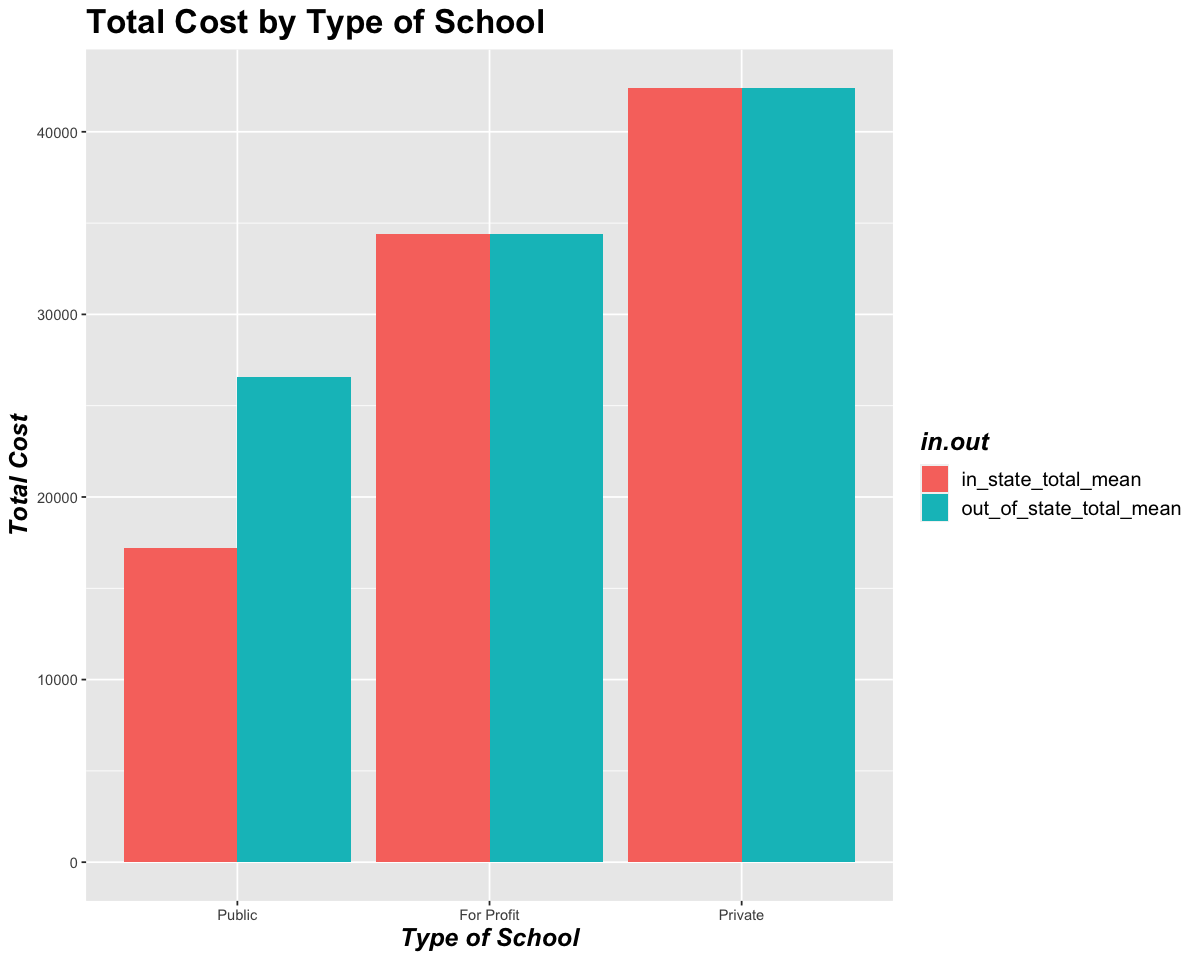

In [15]:
#total_by_type

# get mean total by type of school
total_by_type <- df_rmna |>
    group_by(Type) |>
    summarise(in_state_total_mean = mean(Instate_total), out_of_state_total_mean = mean(Outstate_total))

# sort state order by in_state_total_mean
total_by_type_fct <- mutate(total_by_type, Type = fct_reorder(Type, in_state_total_mean, .desc = FALSE))

# bar chart - mean total by type
total_by_type_long <- pivot_longer(total_by_type_fct, cols = 2:3, names_to ="in.out", values_to = "total")

options(repr.plot.width=10, repr.plot.height=8)

total_by_type_plot <- ggplot(data=total_by_type_long, aes(x=Type, y=total, fill=in.out)) +
    geom_bar(stat="identity", position=position_dodge()) + 
    labs(x="Type of School", y="Total Cost", title="Total Cost by Type of School") + 
    theme(plot.title = element_text(size=20, face="bold"),
          axis.title.x = element_text(size=15, face="bold.italic"),
          axis.title.y = element_text(size=15, face="bold.italic"),
          legend.title = element_text(size = 15, face="bold.italic"),
          legend.text = element_text(size = 12))
total_by_type_plot

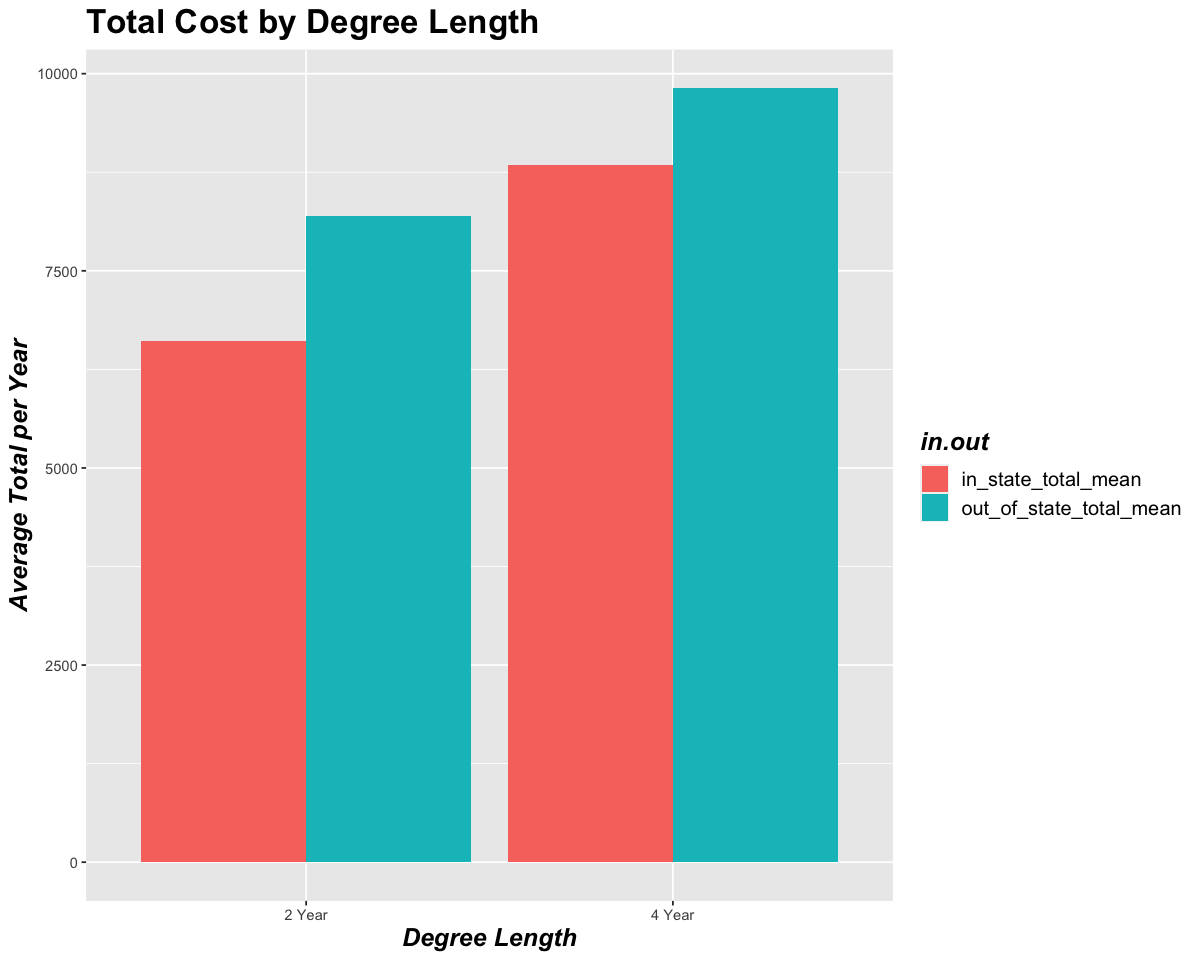

In [16]:
#total_by_length

# get mean total by length of school
total_by_length <- df_rmna |>
    group_by(Degree_length) |>
    summarise(in_state_total_mean = mean(Instate_total), out_of_state_total_mean = mean(Outstate_total))

# sort state order by in_state_total_mean
total_by_length_fct <- mutate(total_by_length, Degree_length = fct_reorder(Degree_length, in_state_total_mean, .desc = FALSE))

# bar chart - mean total by length
total_by_length_long <- pivot_longer(total_by_length_fct, cols = 2:3, names_to ="in.out", values_to = "total")

# calculate average total per year
average_by_length_long <- total_by_length_long |>
    mutate(average = case_when(Degree_length == '4 Year' ~ total/4,
                              Degree_length == '2 Year' ~ total/2))

options(repr.plot.width=10, repr.plot.height=8)

average_by_length_plot <- ggplot(data=average_by_length_long, aes(x=Degree_length, y=average, fill=in.out)) +
    geom_bar(stat="identity", position=position_dodge()) + 
    labs(x="Degree Length", y="Average Total per Year", title="Total Cost by Degree Length") + 
    theme(plot.title = element_text(size=20, face="bold"),
          axis.title.x = element_text(size=15, face="bold.italic"),
          axis.title.y = element_text(size=15, face="bold.italic"),
          legend.title = element_text(size = 15, face="bold.italic"),
          legend.text = element_text(size = 12))
average_by_length_plot

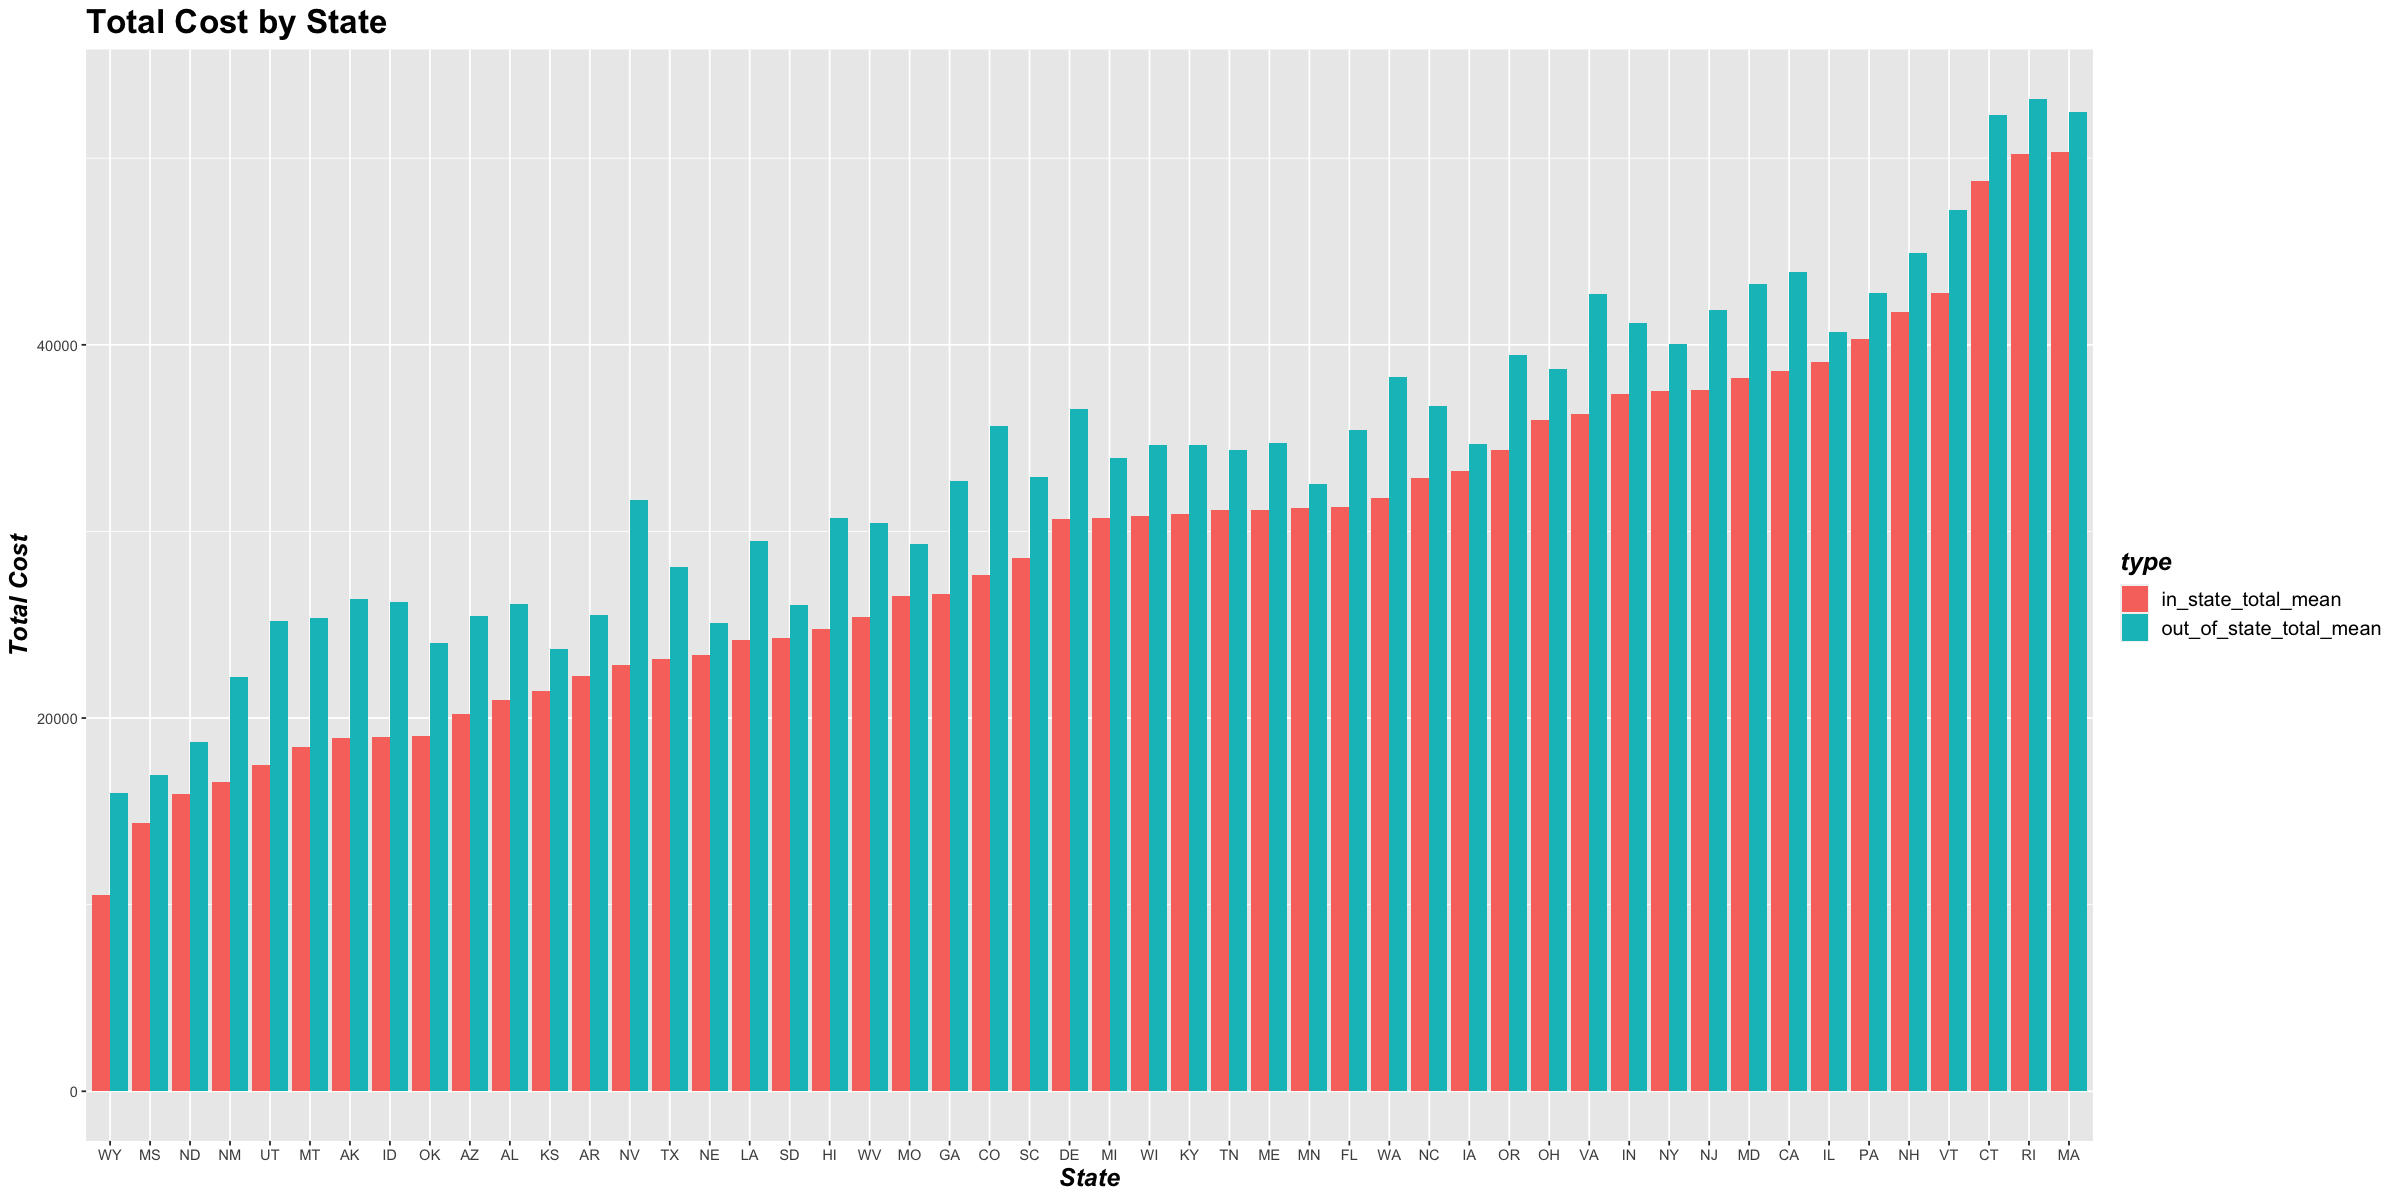

In [121]:
#total_by_state

# get mean in-state and out-of-state total by state
total_by_state <- df_rmna |>
    group_by(State_code) |>
    summarise(in_state_total_mean = mean(Instate_total), out_of_state_total_mean = mean(Outstate_total))

options(repr.plot.width=20, repr.plot.height=10)

# sort state order by in_state_total_mean
total_by_state_fct <- mutate(total_by_state, State_code = fct_reorder(State_code, in_state_total_mean, .desc = FALSE))

# bar chart - mean total by state 
total_by_state_long <- pivot_longer(total_by_state_fct, cols = 2:3, names_to ="type", values_to = "total")
total_by_state_long$type <- as.factor(total_by_state_long$type)

total_by_state_plot <- ggplot(data=total_by_state_long, aes(x=State_code, y=total, fill=type)) +
    geom_bar(stat="identity", position=position_dodge()) + 
    labs(x="State", y="Total Cost", title="Total Cost by State") + 
    theme(plot.title = element_text(size=20, face="bold"),
          axis.title.x = element_text(size=15, face="bold.italic"),
          axis.title.y = element_text(size=15, face="bold.italic"),
          legend.title = element_text(size = 15, face="bold.italic"),
          legend.text = element_text(size = 12))
total_by_state_plot

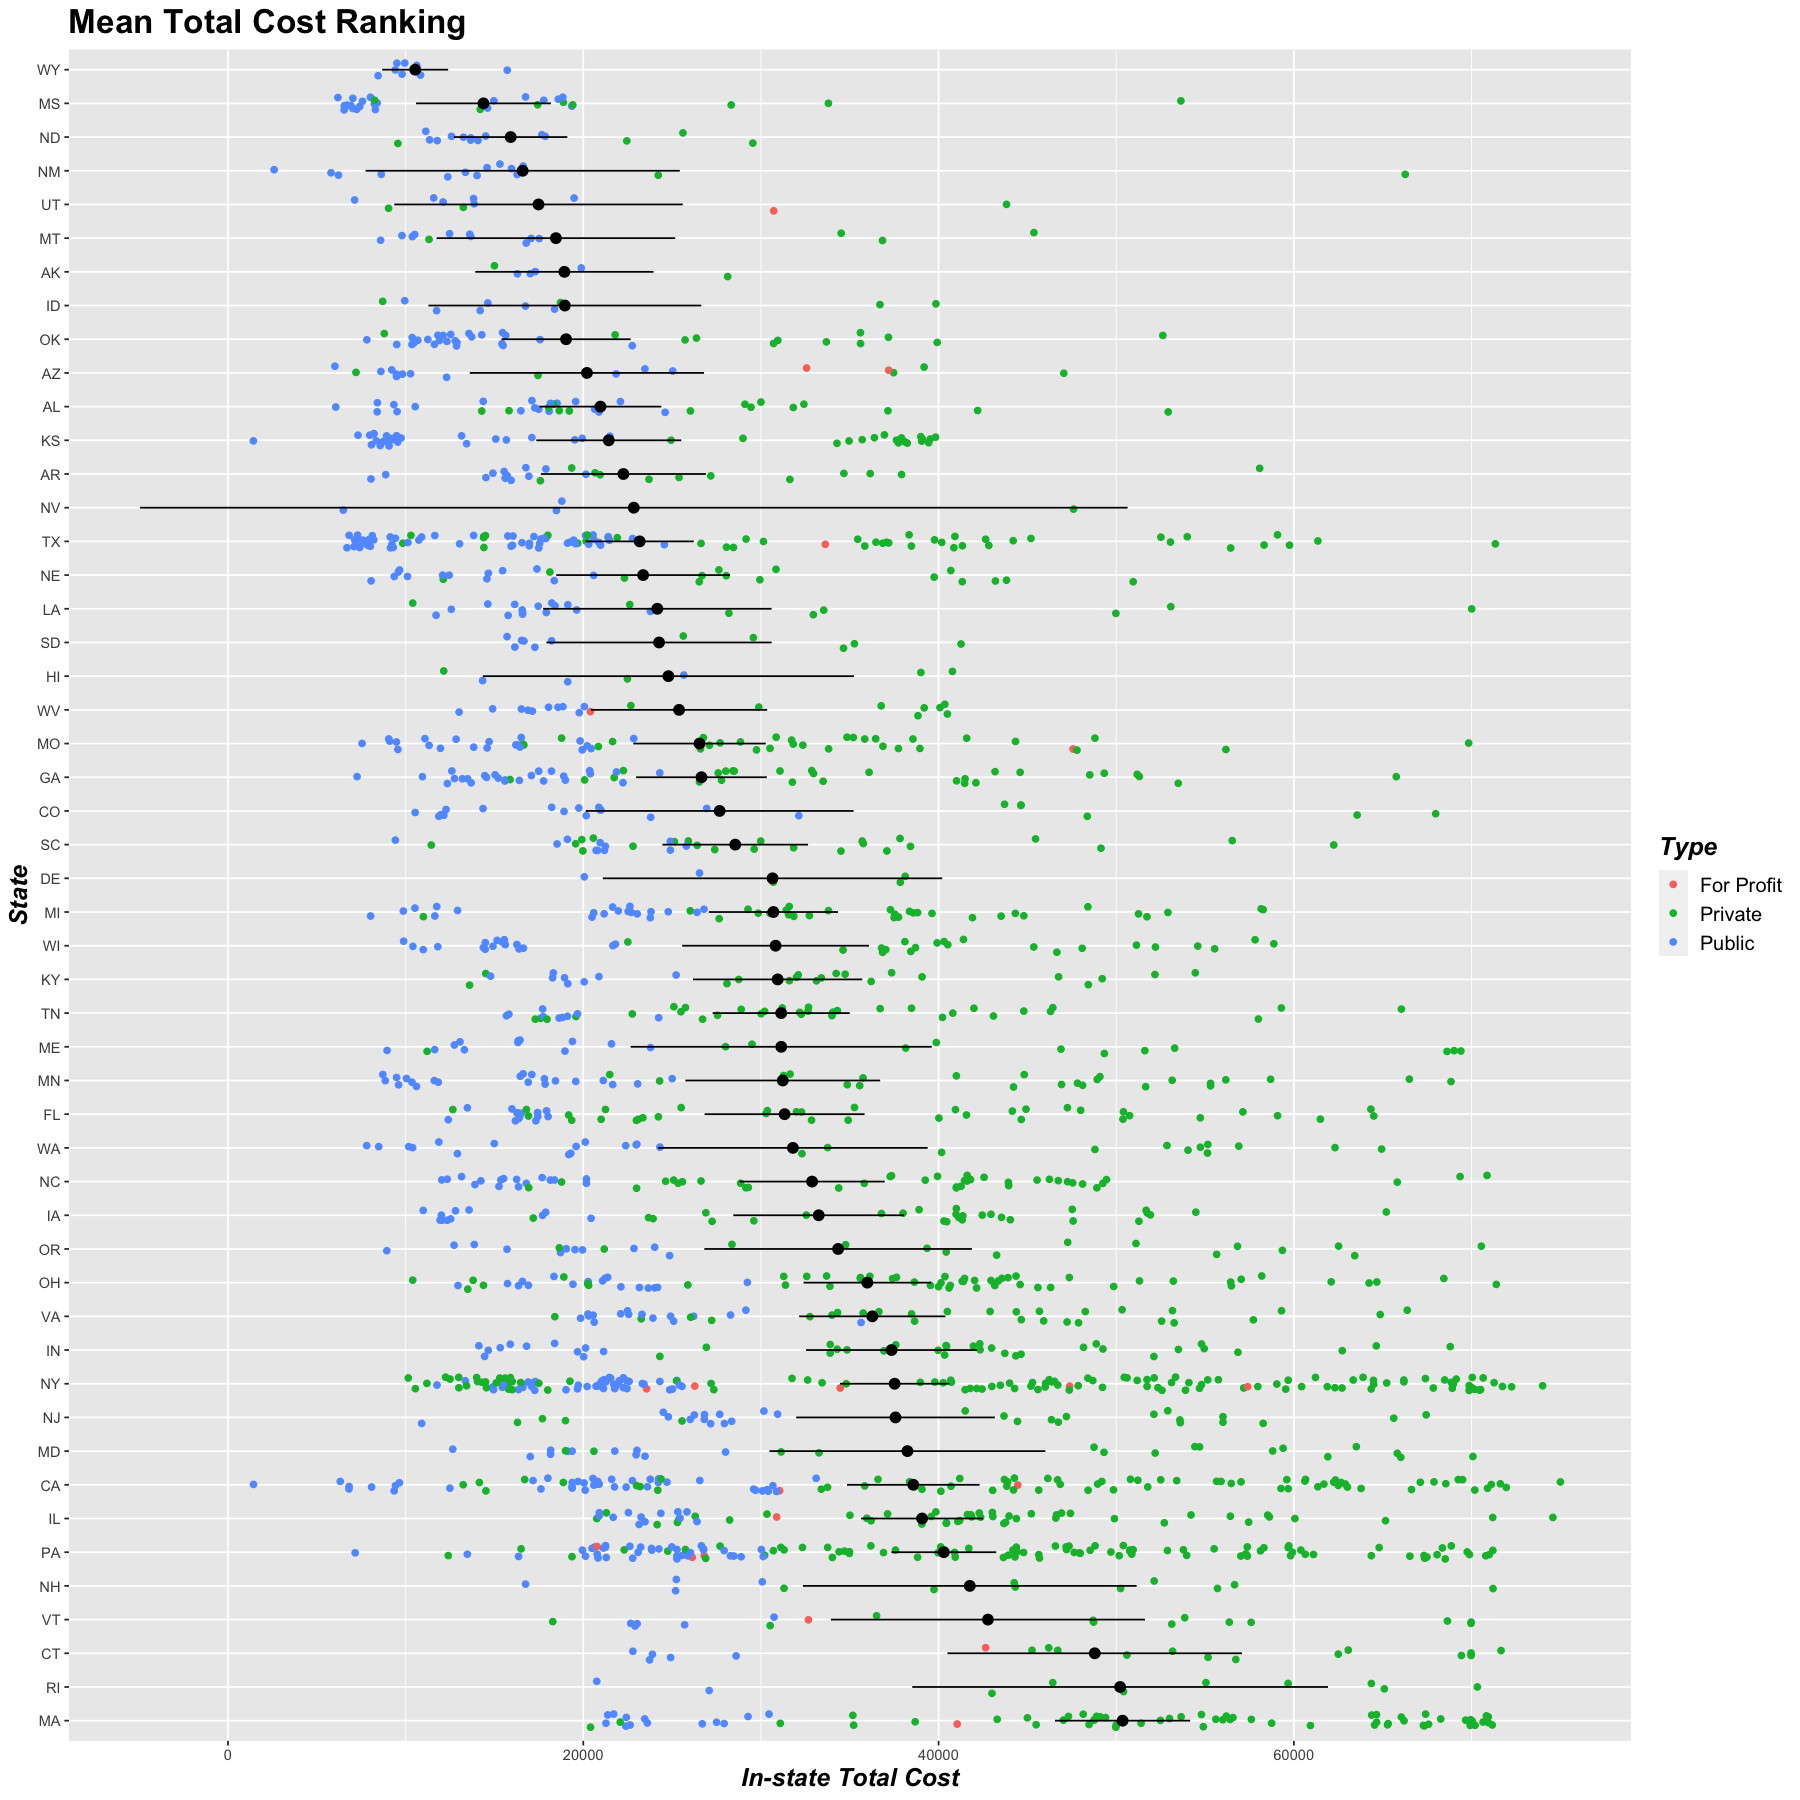

In [21]:
# sort state order by in_state_total_mean
df_rmna_fct <- mutate(df_rmna, State_code = fct_reorder(State_code, Instate_total, .fun = mean, .desc = TRUE))

# plot in-state total by state and type of school 
options(repr.plot.width=15, repr.plot.height=15)
in_total_by_state_jitter <- ggplot(df_rmna_fct, aes(Instate_total, State_code)) +
    geom_jitter(aes(color = Type), height = 0.2) + 
    geom_pointrange(stat = 'summary', fun.data = mean_cl_normal) + 
    labs(x="In-state Total Cost", y = "State", title="Mean Total Cost Ranking") + 
    theme(plot.title = element_text(size=20, face="bold"),
          axis.title.x = element_text(size=15, face="bold.italic"),
          axis.title.y = element_text(size=15, face="bold.italic"),
          legend.title = element_text(size = 15, face="bold.italic"),
          legend.text = element_text(size = 12))
in_total_by_state_jitter

`summarise()` has grouped output by 'State_code'. You can override using the `.groups` argument.



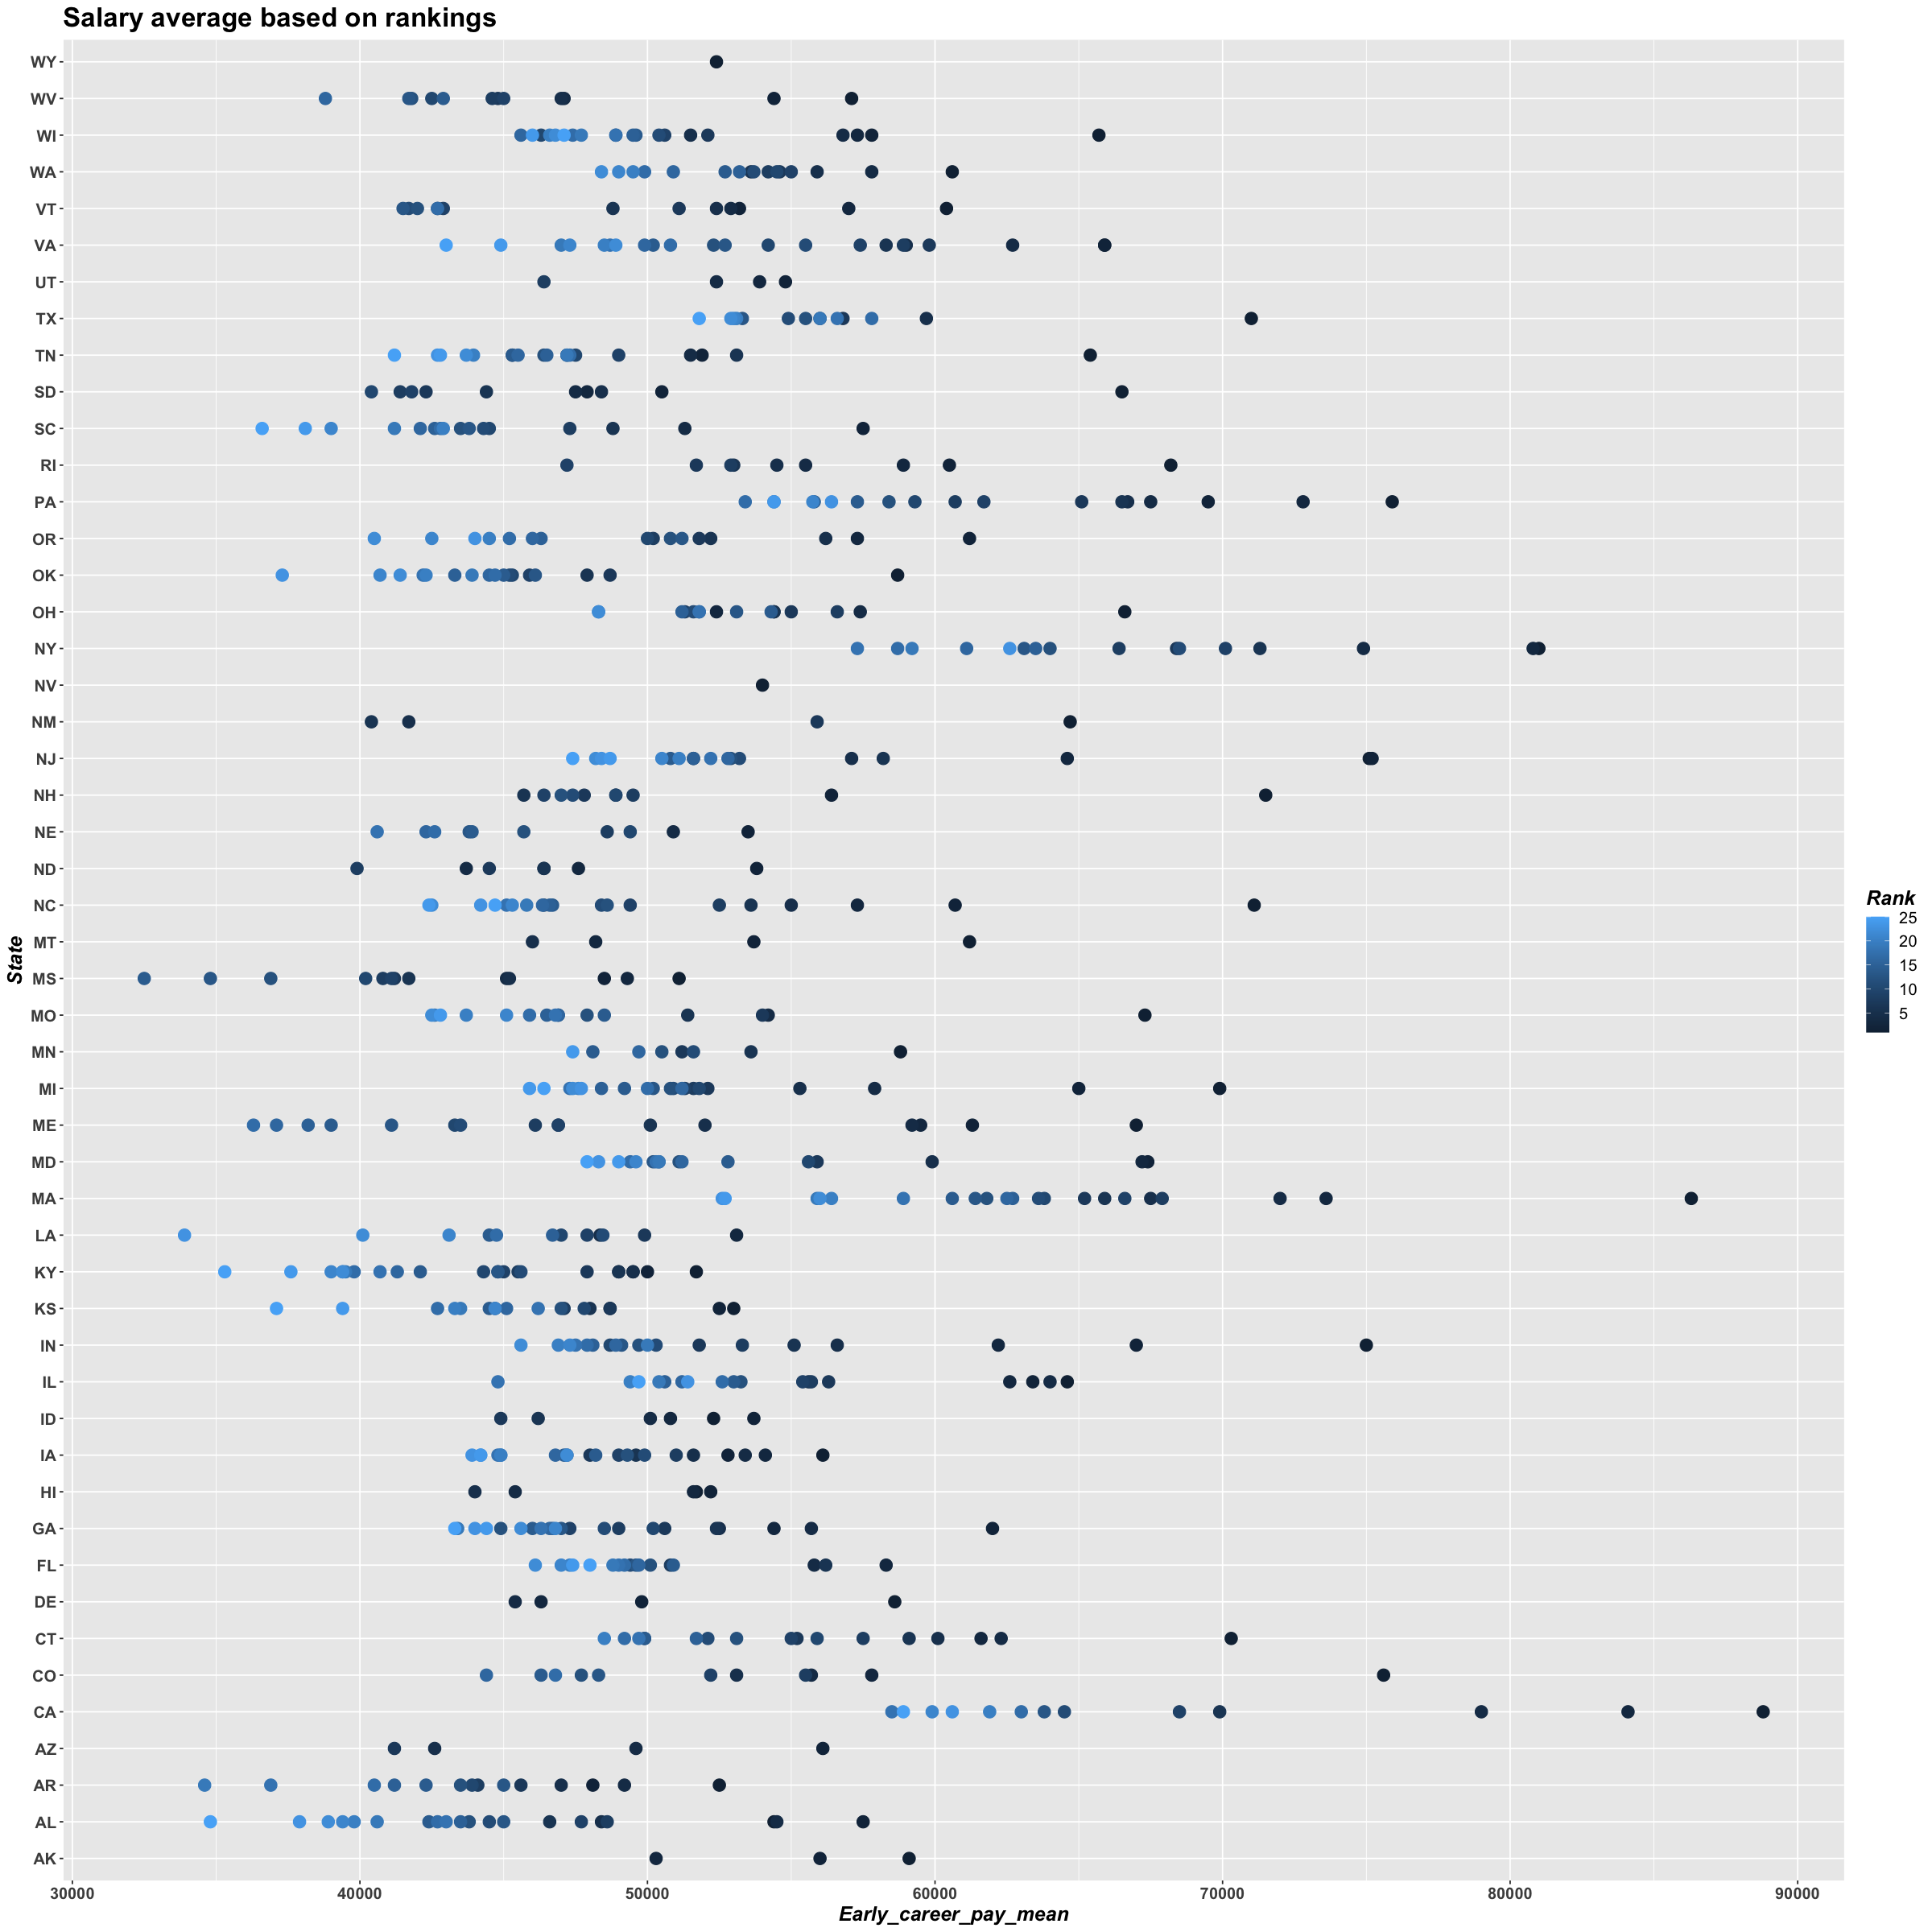

In [130]:
options(repr.plot.width=20, repr.plot.height=20)

test_rmna %>% 
group_by(State_code,Rank) %>% 
summarise(early_pay_mean = mean(Early_career_pay)) %>%
ggplot()+
aes(x=early_pay_mean,y=State_code,color=Rank)+
geom_point(size=4)+
labs(x='Early_career_pay_mean',y='State',title='Salary average based on rankings')+
    theme(plot.title = element_text(size=20, face="bold"),
          axis.title = element_text(size=15, face="bold.italic"),
          axis.text = element_text(size=12, face="bold"),
          legend.title = element_text(size = 15, face="bold.italic"),
          legend.text = element_text(size = 12))


In [132]:
#install.packages('usmap')
library(usmap)
options(repr.plot.width=10, repr.plot.height=8)

# plot_usmap() requires a 'state' column
total_by_state$state <- total_by_state$State_code

a <- plot_usmap(data = total_by_state, values = "in_state_total_mean", color = "red", labels = T) + 
    scale_fill_continuous(
        low = "white", 
        high = "red", 
        name = "Mean In-state Total Cost", 
        guide = guide_colourbar(barwidth = 40, 
                                barheight = 0.4,
                                #put legend title on top of legend 
                                title.position = "top"),
        label = scales::dollar) + 
    theme(legend.position = "bottom",
        legend.title=element_text(size=18, face = 'bold.italic'), 
        legend.text=element_text(size=12, face = 'bold.italic'),
        plot.title = element_text(size = 20, face = 'bold')) + 
    labs(title="In-state Total Cost Heatmap")

In [131]:
test <- left_join(df,salarydf,by='Name')
test <- test[ -c(12,14:16) ]
test_rmna <- na.omit(test)
salary_by_rank <- test_rmna |>
    group_by(State_code) |>
    summarise(early_pay_mean = mean(Early_career_pay))

options(repr.plot.width=20, repr.plot.height=10)

salary_by_rank_fct <- mutate(salary_by_rank, State_code = fct_reorder(State_code, early_pay_mean, .desc = FALSE))

library(usmap)
options(repr.plot.width=10, repr.plot.height=8)

salary_by_rank_fct$state=salary_by_rank_fct$State_code

b <- plot_usmap(data = salary_by_rank_fct, values = "early_pay_mean", color = "blue", labels = T) + 
    scale_fill_continuous(
        low = "white", 
        high = "blue", 
        name = "Early career pay mean", 
        guide = guide_colourbar(barwidth = 40, 
                                barheight = 0.4,
                                #put legend title on top of legend 
                                title.position = "top"),
        label = scales::dollar) + 
    theme(legend.position = "bottom",
        legend.title=element_text(size=18, face = 'bold.italic'), 
        legend.text=element_text(size=12, face = 'bold.italic'),
        plot.title = element_text(size = 20, face = 'bold')) + 
    labs(title="State wise early career pay mean")

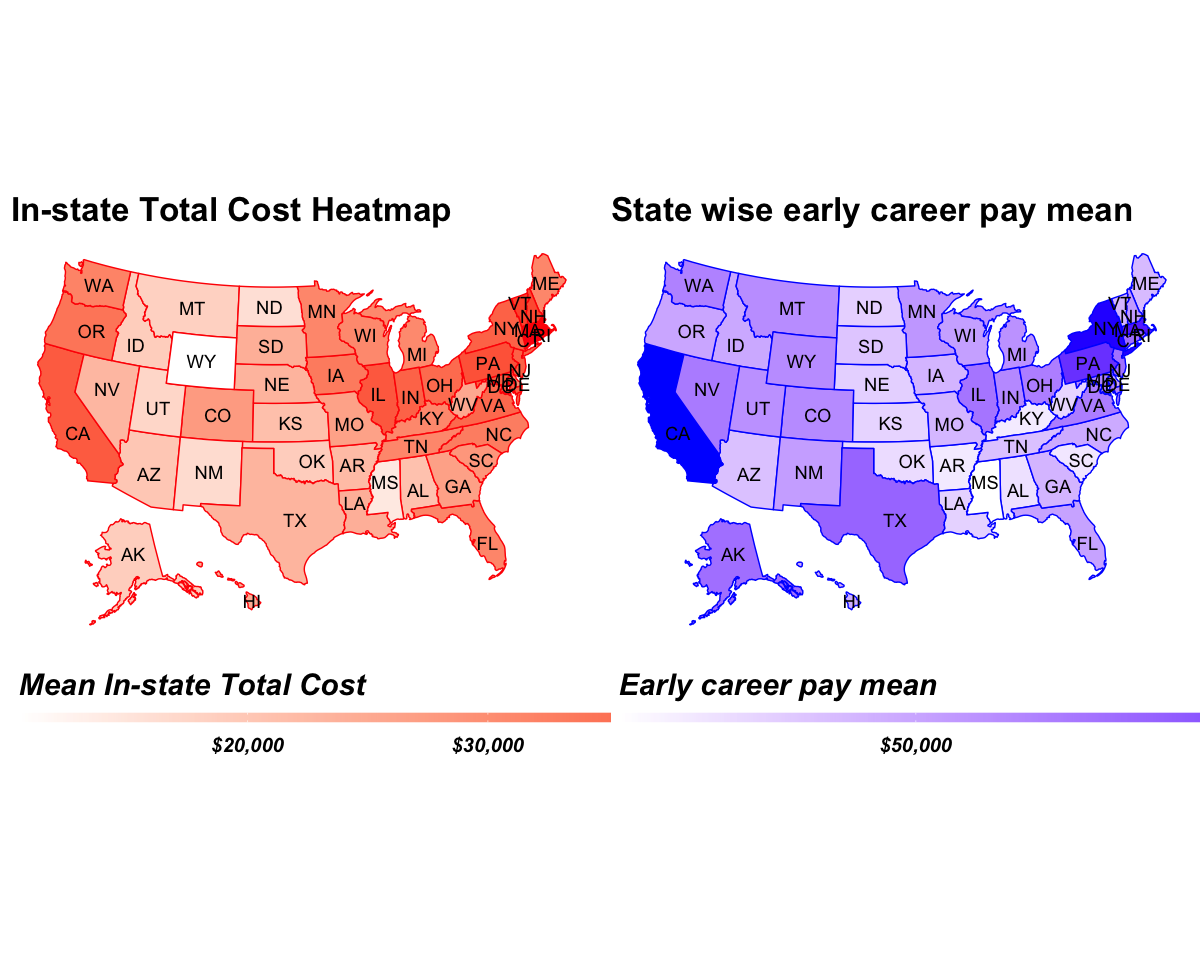

In [143]:
library(cowplot)
options(repr.plot.width=10, repr.plot.height=8)
plot_grid(a,b)

### Step 8: Summary and conclusion

#### 1 total_by_type
    The plot provides us with an visual of how much each type of school charges for instate and out of state students.We see that out of state students are charged more in public universities but in private and for profit universities we see that cost is same for both instate and out of state students.
    
#### 2 total_by_degree_length
    As we already know that as the years increase the cost of the program are generally high, this plot shows us the same that 4 year degree costs more than 2 year degree, and also that out of state students pay more tuition cost when compared to in state students.
#### 3 total_by_state
    Plot provides us with tuition cost as per the states, we see that the univeristies or colleges present in major cities say like California , New York, Massachusetts tend to have higher tuition cost as they provide more job opportunities for their students. The same has been explained by the heat-map as well.
#### 4 sort state order by in_state_total_mean
    This plot gives a mean of tuition cost for in state students and sorted as state wise, this also clearly shows that the private universities are towards higher end.
#### 5 average salary based on the rankings of school
    Here we have visualized how the ranking of the school has an impact on the average early salary of students fom those respective schools.
#### 6 usmap with instate tuition cost and highest average salary.
    By seeing both the maps we can conclude that school from cities like California , New York, Massachusetts tend to have higher tuition cost as they provide more job opportunities for their students, this is proved from the blue map where we do see that average mean salary being high from those regions 

## Research questions

### Question 1
    Does gender have any impact on the tuition cost? We could gather some more insight we gather the gender of the students in these universities/ colleges. It will provide with insight to see if gender has any impact on tuition cost.
    
### Question 2
    Ranking of the university could provide more information as to the cost of the tuition, Better the ranking more would be the tuition cost of the respective school.
### Question 3
    We could predict the general increase in the cost over years if we have the data of tuition cost over years,which would help us to see the changes over time to see increase or decrease in tuition cost.
    